<a href="https://colab.research.google.com/github/TranQuocHuy83/mlops_training---module02---HuyTran-/blob/main/03_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Exercise 3: Training Models
PyTorch Workflow Fundamentals - Module 2

This exercise covers:
- Setting up loss functions
- Using optimizers
- Implementing the 5-step training loop
- Tracking training progress
- Visualizing training curves

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# ============================================
# Part 1: Setup - Data and Model
# ============================================

In [14]:
print("=" * 60)
print("Part 1: Setup - Data and Model")
print("=" * 60)

# TODO: Create synthetic data
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

# TODO: Split data
train_split = int(0.7 * len(X))
val_split = int(0.85 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split:val_split], y[train_split:val_split]

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")

# TODO: Create model


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias

model = LinearRegressionModel()

print(f"\nInitial parameters:")
print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
print(f"  Bias: {model.bias.item():.4f} (true: {bias})")

Part 1: Setup - Data and Model
Train size: 35
Validation size: 7

Initial parameters:
  Weight: 1.3221 (true: 0.7)
  Bias: 0.8172 (true: 0.3)


# ============================================
# Part 2: Loss Function and Optimizer
# ============================================

In [15]:
print("\n" + "=" * 60)
print("Part 2: Loss Function and Optimizer")
print("=" * 60)

# TODO: Define loss function
criterion = nn.MSELoss()
print(f"Loss function: MSELoss (Mean Squared Error)")

# TODO: Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
print(f"Optimizer: SGD (learning rate=0.01)")

# TODO: Calculate initial loss
with torch.no_grad():
    initial_pred = model(X_train)
    initial_loss = criterion(initial_pred, y_train)

print(f"\nInitial training loss: {initial_loss.item():.4f}")


Part 2: Loss Function and Optimizer
Loss function: MSELoss (Mean Squared Error)
Optimizer: SGD (learning rate=0.01)

Initial training loss: 0.5468


In [16]:
# ============================================
# Part 3: The 5-Step Training Loop
# ============================================

print("\n" + "=" * 60)
print("Part 3: The 5-Step Training Loop")
print("=" * 60)

# TODO: Implement one training step
print("\nOne training step:")

# Step 1: Forward pass
y_pred = model(X_train)
print(f"1. Forward pass - predictions shape: {y_pred.shape}")

# Step 2: Calculate loss
loss = criterion(y_pred, y_train)
print(f"2. Calculate loss - loss value: {loss.item():.4f}")

# Step 3: Zero gradients
optimizer.zero_grad()
print(f"3. Zero gradients - cleared previous gradients")

# Step 4: Backward pass
loss.backward()
print(f"4. Backward pass - computed gradients")
print(f"   Weight gradient: {model.weight.grad.item():.4f}")
print(f"   Bias gradient: {model.bias.grad.item():.4f}")

# Step 5: Update parameters
optimizer.step()
print(f"5. Update parameters - optimizer stepped")

print(f"\nParameters after one step:")
print(f"  Weight: {model.weight.item():.4f}")
print(f"  Bias: {model.bias.item():.4f}")


Part 3: The 5-Step Training Loop

One training step:
1. Forward pass - predictions shape: torch.Size([35, 1])
2. Calculate loss - loss value: 0.5468
3. Zero gradients - cleared previous gradients
4. Backward pass - computed gradients
   Weight gradient: 0.5463
   Bias gradient: 1.4574
5. Update parameters - optimizer stepped

Parameters after one step:
  Weight: 1.3167
  Bias: 0.8026


# ============================================
# Part 4: Complete Training Loop
# ============================================

In [22]:
print("\n" + "=" * 60)
print("Part 4: Complete Training Loop")
print("=" * 60)

# TODO: Reinitialize model
model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 500
train_losses = []
val_losses = []

print(f"\nTraining for {epochs} epochs...")
print("-" * 60)

for epoch in range(epochs):
    ### Training
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    ### Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)
        val_losses.append(val_loss.item())

    ### Print progress
    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}")

print(f"\nFinal parameters:")
print(f"  Weight: {model.weight.item():.4f} (true: {weight})")
print(f"  Bias: {model.bias.item():.4f} (true: {bias})")


Part 4: Complete Training Loop

Training for 500 epochs...
------------------------------------------------------------
Epoch   0: Train Loss = 0.1562, Val Loss = 0.3049
Epoch  20: Train Loss = 0.0652, Val Loss = 0.1546
Epoch  40: Train Loss = 0.0283, Val Loss = 0.0850
Epoch  60: Train Loss = 0.0134, Val Loss = 0.0512
Epoch  80: Train Loss = 0.0073, Val Loss = 0.0340
Epoch 100: Train Loss = 0.0047, Val Loss = 0.0247
Epoch 120: Train Loss = 0.0037, Val Loss = 0.0194
Epoch 140: Train Loss = 0.0032, Val Loss = 0.0162
Epoch 160: Train Loss = 0.0029, Val Loss = 0.0142
Epoch 180: Train Loss = 0.0028, Val Loss = 0.0128
Epoch 200: Train Loss = 0.0027, Val Loss = 0.0119
Epoch 220: Train Loss = 0.0026, Val Loss = 0.0112
Epoch 240: Train Loss = 0.0025, Val Loss = 0.0107
Epoch 260: Train Loss = 0.0025, Val Loss = 0.0102
Epoch 280: Train Loss = 0.0024, Val Loss = 0.0099
Epoch 300: Train Loss = 0.0023, Val Loss = 0.0095
Epoch 320: Train Loss = 0.0022, Val Loss = 0.0092
Epoch 340: Train Loss = 0.002


Part 5: Visualizing Training Progress


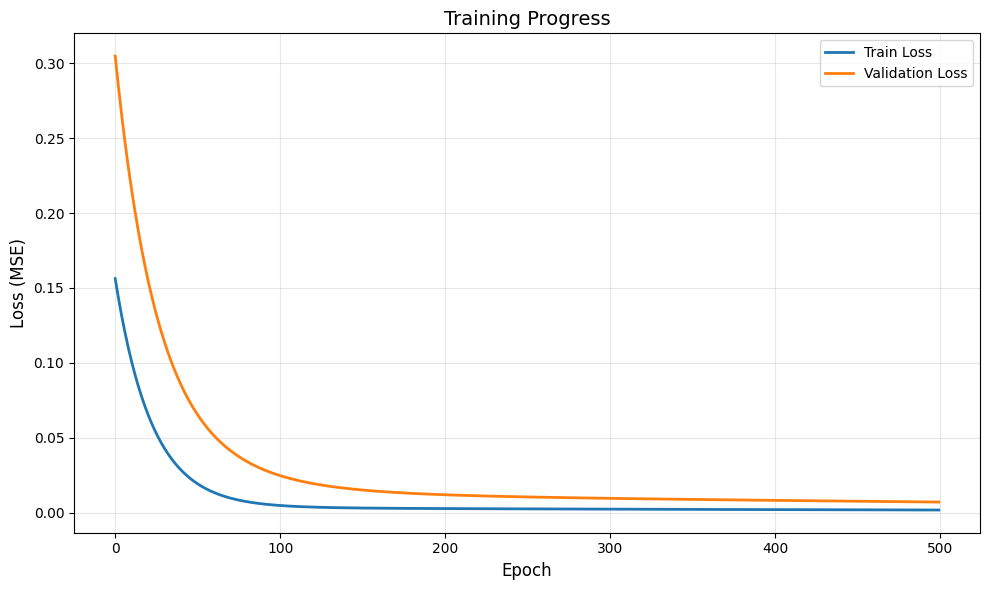

Training curve visualized!


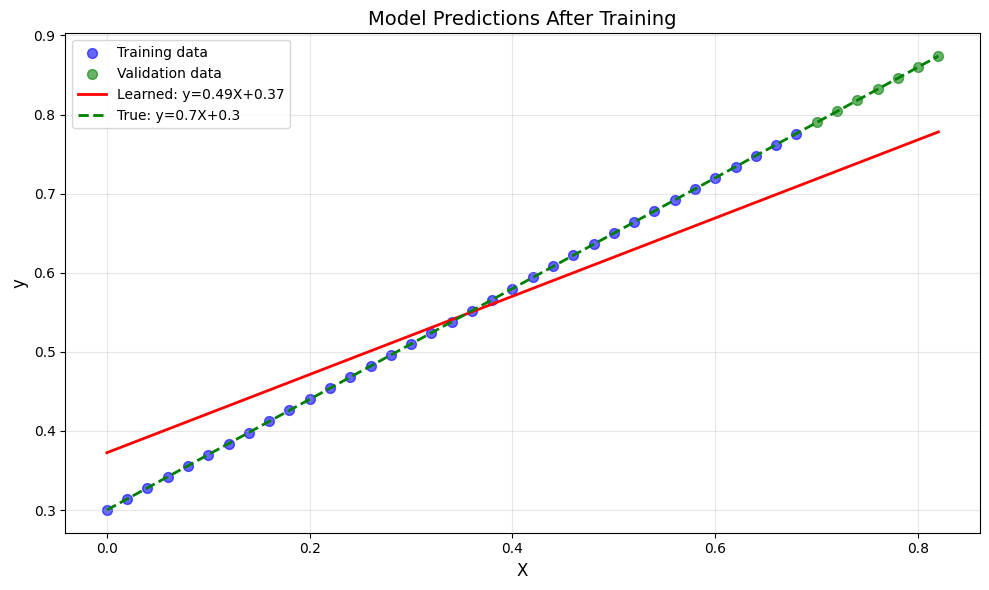

Predictions visualized!


In [23]:
# ============================================
# Part 5: Visualizing Training Progress
# ============================================

print("\n" + "=" * 60)
print("Part 5: Visualizing Training Progress")
print("=" * 60)

# TODO: Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(fontsize=10)
plt.title('Training Progress', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Training curve visualized!")

# TODO: Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', s=50, alpha=0.6, label='Training data')
plt.scatter(X_val, y_val, c='g', s=50, alpha=0.6, label='Validation data')

with torch.no_grad():
    X_all = torch.cat([X_train, X_val])
    y_pred_all = model(X_all)
    plt.plot(X_all, y_pred_all, 'r-', linewidth=2,
             label=f"Learned: y={model.weight.item():.2f}X+{model.bias.item():.2f}")
    plt.plot(X_all, weight * X_all + bias, 'g--', linewidth=2,
             label=f"True: y={weight}X+{bias}")

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.title('Model Predictions After Training', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Predictions visualized!")

# ============================================
# Exercises
# ============================================


Exercises

Exercise 1: Learning rate experiments


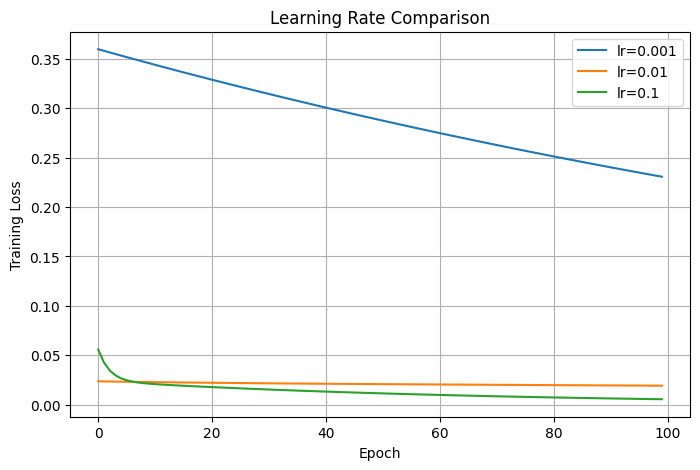

Tip: Create a loop over different learning rates and store results


In [24]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)

# Exercise 1: Learning rate experiments
print("\nExercise 1: Learning rate experiments")
# TODO: Train with lr=0.001, 0.01, 0.1
learning_rates = [0.001, 0.01, 0.1]
results = {}
epochs = 100
# TODO: Compare training curves
for lr in learning_rates:
    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    losses = []

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    results[lr] = losses

# TODO: Visualize all on same plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for lr, losses in results.items():
    plt.plot(losses, label=f"lr={lr}")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Learning Rate Comparison")
plt.legend()
plt.grid(True)
plt.show()

print("Tip: Create a loop over different learning rates and store results")


Exercise 2: Optimizer comparison


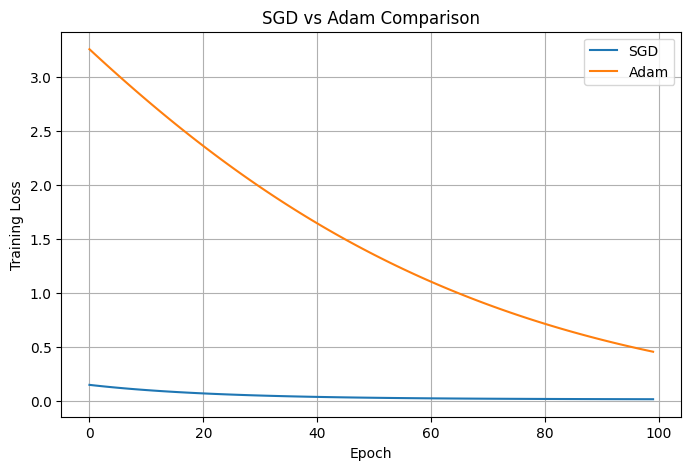

Tip: optim.Adam(model.parameters(), lr=0.01)


In [25]:
# Exercise 2: Optimizer comparison
print("\nExercise 2: Optimizer comparison")
# TODO: Compare SGD vs Adam
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.01),
    "Adam": lambda params: optim.Adam(params, lr=0.01)
}

epochs = 100
results = {}

# TODO: Compare convergence speed
for name, optimizer_fn in optimizers.items():
    model = LinearRegressionModel()
    optimizer = optimizer_fn(model.parameters())

    losses = []

    for epoch in range(epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    results[name] = {
        "losses": losses,
        "final_weight": model.weight.item(),
        "final_bias": model.bias.item()
    }

# TODO: Compare final results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for name in results:
    plt.plot(results[name]["losses"], label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("SGD vs Adam Comparison")
plt.legend()
plt.grid(True)
plt.show()

print("Tip: optim.Adam(model.parameters(), lr=0.01)")

In [26]:
# Exercise 3: Early stopping
print("\nExercise 3: Early stopping")
# TODO: Implement early stopping
patience = 10
best_val_loss = float("inf")
patience_counter = 0

epochs = 200
model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(epochs):
    ### Training
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    print(f"Epoch {epoch:3d} | Train: {loss.item():.4f} | Val: {val_loss.item():.4f}")

    # Early stopping logic
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0

        # Save best model
        best_model_state = model.state_dict()

    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("\nEarly stopping triggered!")
        break

# Load best model
model.load_state_dict(best_model_state)

print("\nBest validation loss:", best_val_loss)
print("Final parameters:")
print("  Weight:", model.weight.item())
print("  Bias:", model.bias.item())

# TODO: Stop when val loss doesn't improve for N epochs
# TODO: Save best model
print("Tip: Track best_val_loss and use a patience counter")


Exercise 3: Early stopping
Epoch   0 | Train: 0.4967 | Val: 0.8271
Epoch   1 | Train: 0.4749 | Val: 0.7957
Epoch   2 | Train: 0.4541 | Val: 0.7655
Epoch   3 | Train: 0.4341 | Val: 0.7366
Epoch   4 | Train: 0.4151 | Val: 0.7088
Epoch   5 | Train: 0.3969 | Val: 0.6822
Epoch   6 | Train: 0.3795 | Val: 0.6567
Epoch   7 | Train: 0.3629 | Val: 0.6322
Epoch   8 | Train: 0.3470 | Val: 0.6087
Epoch   9 | Train: 0.3318 | Val: 0.5862
Epoch  10 | Train: 0.3173 | Val: 0.5646
Epoch  11 | Train: 0.3034 | Val: 0.5438
Epoch  12 | Train: 0.2902 | Val: 0.5239
Epoch  13 | Train: 0.2775 | Val: 0.5048
Epoch  14 | Train: 0.2654 | Val: 0.4864
Epoch  15 | Train: 0.2538 | Val: 0.4688
Epoch  16 | Train: 0.2428 | Val: 0.4519
Epoch  17 | Train: 0.2322 | Val: 0.4357
Epoch  18 | Train: 0.2221 | Val: 0.4201
Epoch  19 | Train: 0.2125 | Val: 0.4052
Epoch  20 | Train: 0.2032 | Val: 0.3908
Epoch  21 | Train: 0.1944 | Val: 0.3770
Epoch  22 | Train: 0.1860 | Val: 0.3638
Epoch  23 | Train: 0.1779 | Val: 0.3510
Epoch  24 | 


Exercise 4: Different loss functions

Training with MSE Loss
Final Weight: 0.2348
Final Bias: 0.2834

Training with MAE Loss
Final Weight: 0.8711
Final Bias: 0.2381


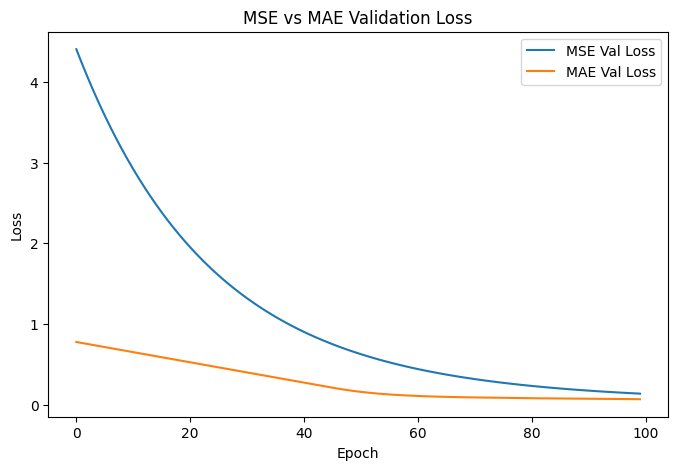

Tip: criterion = nn.L1Loss()


In [30]:
# Exercise 4: Loss functions
print("\nExercise 4: Different loss functions")
# TODO: Try MAE (L1Loss)
# TODO: Compare with MSE
# TODO: Discuss differences
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

loss_functions = {
    "MSE": nn.MSELoss(),
    "MAE": nn.L1Loss()
}

results = {}

epochs = 100

for loss_name, criterion in loss_functions.items():
    print(f"\nTraining with {loss_name} Loss")

    model = LinearRegressionModel()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)
            val_losses.append(val_loss.item())

    results[loss_name] = {
        "train": train_losses,
        "val": val_losses,
        "weight": model.weight.item(),
        "bias": model.bias.item()
    }

    print(f"Final Weight: {model.weight.item():.4f}")
    print(f"Final Bias: {model.bias.item():.4f}")

    #
plt.figure(figsize=(8,5))

for loss_name in results:
    plt.plot(results[loss_name]["val"], label=f"{loss_name} Val Loss")

plt.legend()
plt.title("MSE vs MAE Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


print("Tip: criterion = nn.L1Loss()")


Exercise 5: Training analysis


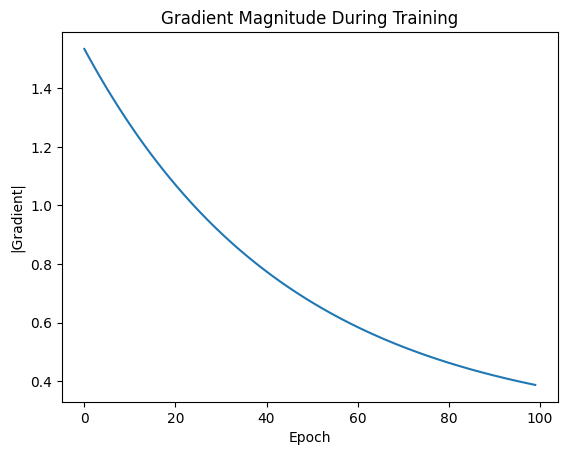

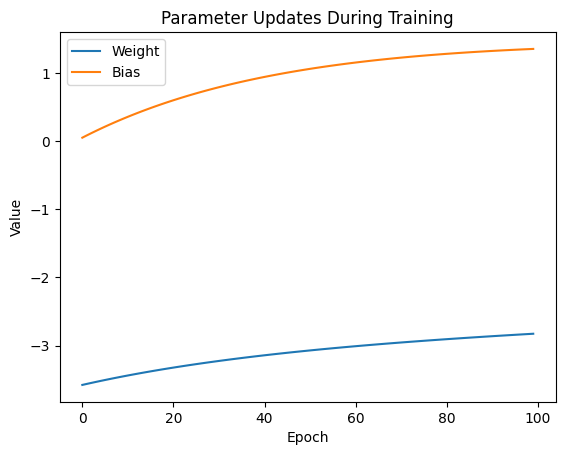

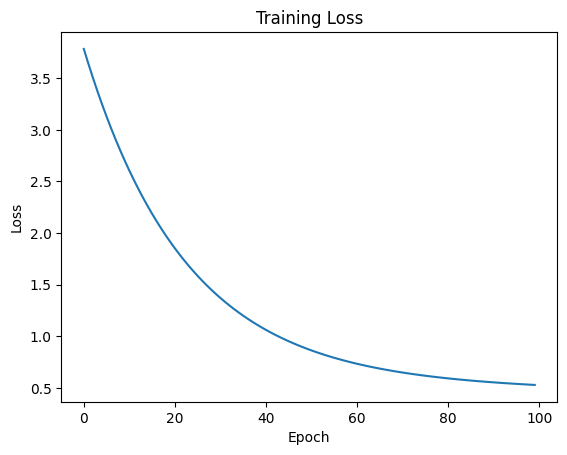

Tip: Store param.grad.item() each epoch to plot gradients

Exercise 3 Complete!
Remember: Experiment, experiment, experiment!


In [31]:
# Exercise 5: Training analysis
print("\nExercise 5: Training analysis")
# TODO: Plot gradient magnitudes during training
import matplotlib.pyplot as plt

model = LinearRegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

epochs = 100

gradients = []
weights = []
biases = []
train_losses = []

for epoch in range(epochs):

    # Forward
    model.train()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Store gradient magnitude (weight only)
    grad_value = model.weight.grad.item()
    gradients.append(abs(grad_value))

    # Update
    optimizer.step()

    # Store parameters
    weights.append(model.weight.item())
    biases.append(model.bias.item())
    train_losses.append(loss.item())

# TODO: Plot parameter updates
plt.figure()
plt.plot(gradients)
plt.title("Gradient Magnitude During Training")
plt.xlabel("Epoch")
plt.ylabel("|Gradient|")
plt.show()

# TODO: Analyze convergence
plt.figure()
plt.plot(weights, label="Weight")
plt.plot(biases, label="Bias")
plt.legend()
plt.title("Parameter Updates During Training")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

plt.figure()
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


print("Tip: Store param.grad.item() each epoch to plot gradients")

print("\n" + "=" * 60)
print("Exercise 3 Complete!")
print("Remember: Experiment, experiment, experiment!")
print("=" * 60)